# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import json
import requests
import geopandas as gpd

from scipy.stats import zscore
from datetime import datetime
from matplotlib import ticker
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# Analyzing and Cleaning the data

In [2]:
df = pd.read_csv('Crimes_2001_to_Present_20250419.csv')
chicago_map = gpd.read_file('chicago_police_districts.geojson')
pd.set_option('display.float_format', '{:.2f}'.format)
df['Year'] = df['Year'].apply(lambda x: '{:.0f}'.format(x))
df['Year'] = pd.to_numeric(df['Year'])
df['ID'] = df['ID'].apply(lambda x: '{:.0f}'.format(x))
df['Date'] = pd.to_datetime(df['Date'])
df['X Coordinate'] = pd.to_numeric(df['X Coordinate'], errors='coerce')
df['Y Coordinate'] = pd.to_numeric(df['Y Coordinate'], errors='coerce')

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,2022-07-29 03:39:00,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.00,30.00,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,2023-01-03 16:44:00,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.00,26.00,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,11227634,JB147599,2017-08-26 10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.00,32.00,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,13203321,JG415333,2023-09-06 17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.00,32.00,14,1174694.00,1901831.00,2023,11/04/2023 03:40:18 PM,41.89,-87.63,"(41.886018055, -87.633937881)"
4,13204489,JG416325,2023-09-06 11:00:00,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,4.00,32.00,06,1176857.00,1896680.00,2023,11/04/2023 03:40:18 PM,41.87,-87.63,"(41.871834768, -87.62615082)"


In [4]:
df.shape

(8296190, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296190 entries, 0 to 8296189
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    object        
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [6]:
df.describe()

,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8296190,8296190.00,8296143.00,7681365.00,7682738.00,8204281.00,8204281.00,8296190.00,8204281.00,8204281.00
mean,2011-04-18 07:31:53.892255744,1184.18,11.30,22.78,37.40,1164638.04,1885893.72,2010.79,41.84,-87.67
min,2001-01-01 00:00:00,111.00,1.00,1.00,0.00,0.00,0.00,2001.00,36.62,-91.69
25%,2005-05-11 17:45:16.750000,621.00,6.00,10.00,23.00,1153047.00,1859190.00,2005.00,41.77,-87.71
50%,2010-03-16 21:45:00,1034.00,10.00,23.00,32.00,1166183.00,1890975.00,2010.00,41.86,-87.67
75%,2016-11-13 20:30:00,1731.00,17.00,34.00,56.00,1176391.00,1909401.00,2016.00,41.91,-87.63
max,2025-04-10 00:00:00,2535.00,31.00,50.00,77.00,1205119.00,1951622.00,2025.00,42.02,-87.52
std,NaN,703.64,6.96,13.86,21.55,16962.74,32447.09,6.91,0.09,0.06


There maybe an outlier as having X-coordinate and Y-coordinate as 0 is a bit odd this will definitely disrupt the dataset and is suspected to come along with abnormal values fro latitude and longitude.

In [7]:
print(df.isnull().sum())

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14200
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614825
Community Area          613452
FBI Code                     0
X Coordinate             91909
Y Coordinate             91909
Year                         0
Updated On                   0
Latitude                 91909
Longitude                91909
Location                 91909
dtype: int64


In [8]:
print("Total Number of Missing Values in the whole dataset : ", df.isna().sum().sum())

Total Number of Missing Values in the whole dataset :  1702069


Inspecting the features, we see that all the features that have a large count of missing values are features that relate to the geographical location of the crime scene. This is No Surprise as the Chicago Crime Dataset is based on first hand accounts of people involved in or around the crime. It is not necessary that such first hand reports need to contain the specific locations of the crime.
Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. 
Therefore, these missing values can be perfectly accounted for.

We have 1702069 missing values in the whole dataset that are present in Location Description, Ward, Community Area, X Co-ordinate, Y Co-ordinate, Latitude, Longitude and Location.
Since, these features are not direct numeric values, we can't use summary statistical functions to fill in the missing values.
Hence, we shall be removing these values from the dataset.

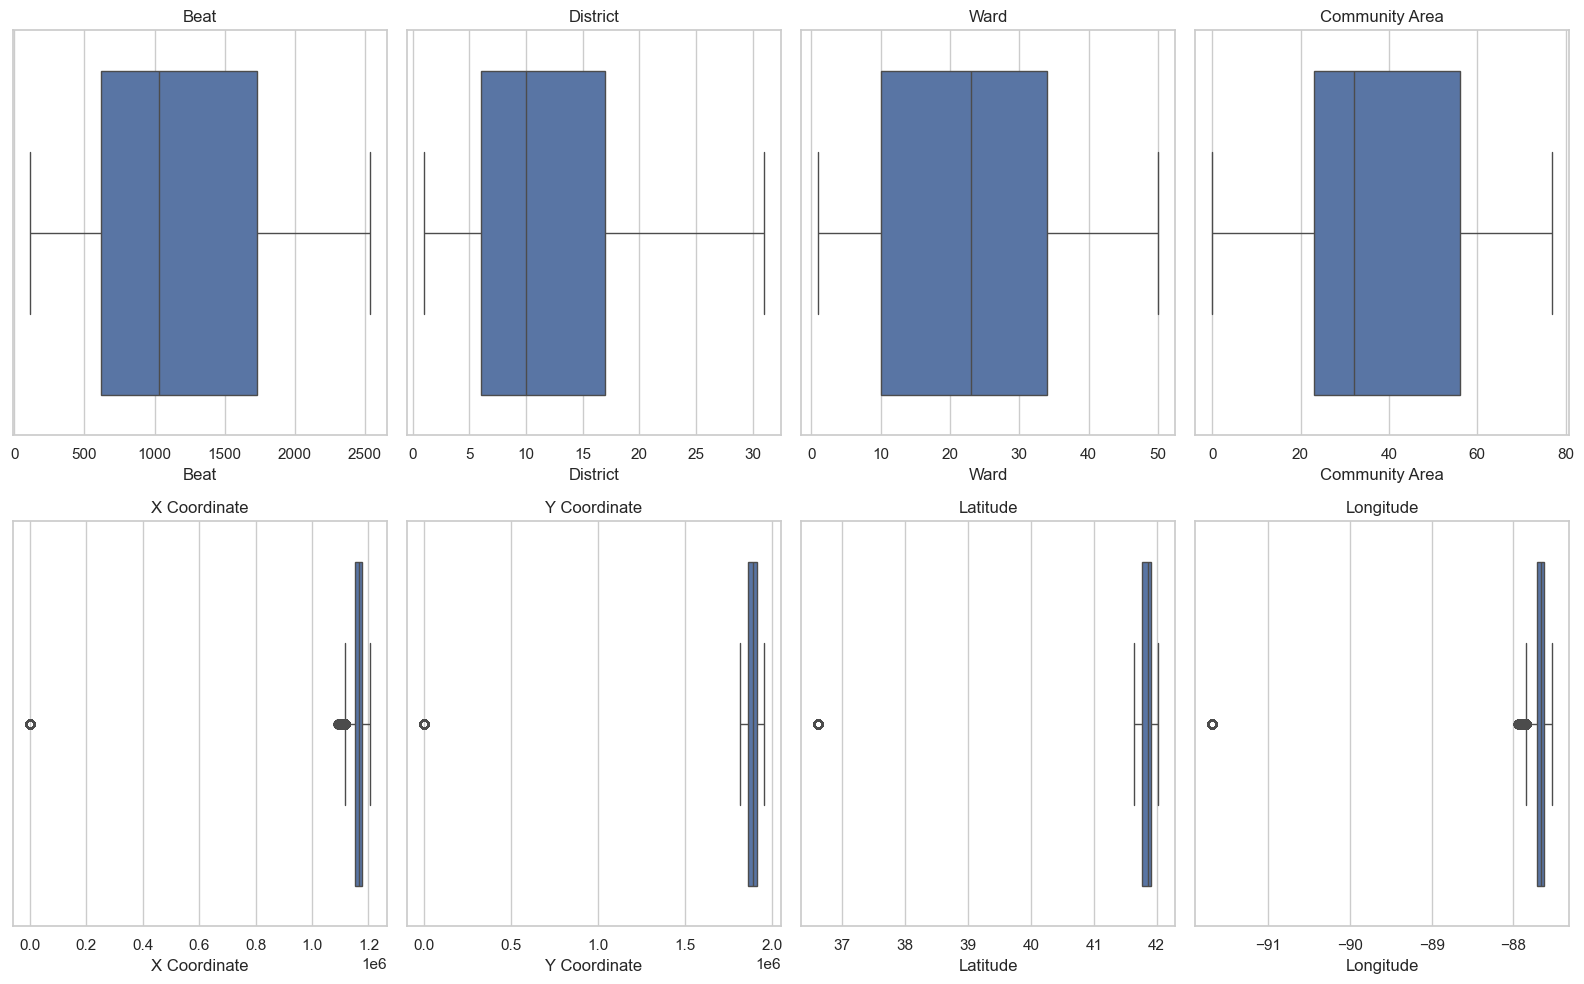

In [9]:
sns.set(style="whitegrid")
columns_to_plot = ['Beat', 'District', 'Ward', 'Community Area',
                   'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude']

# Create boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [10]:
df = df.dropna()
df = df[(df['X Coordinate'] != 0) & (df['Y Coordinate'] != 0)]

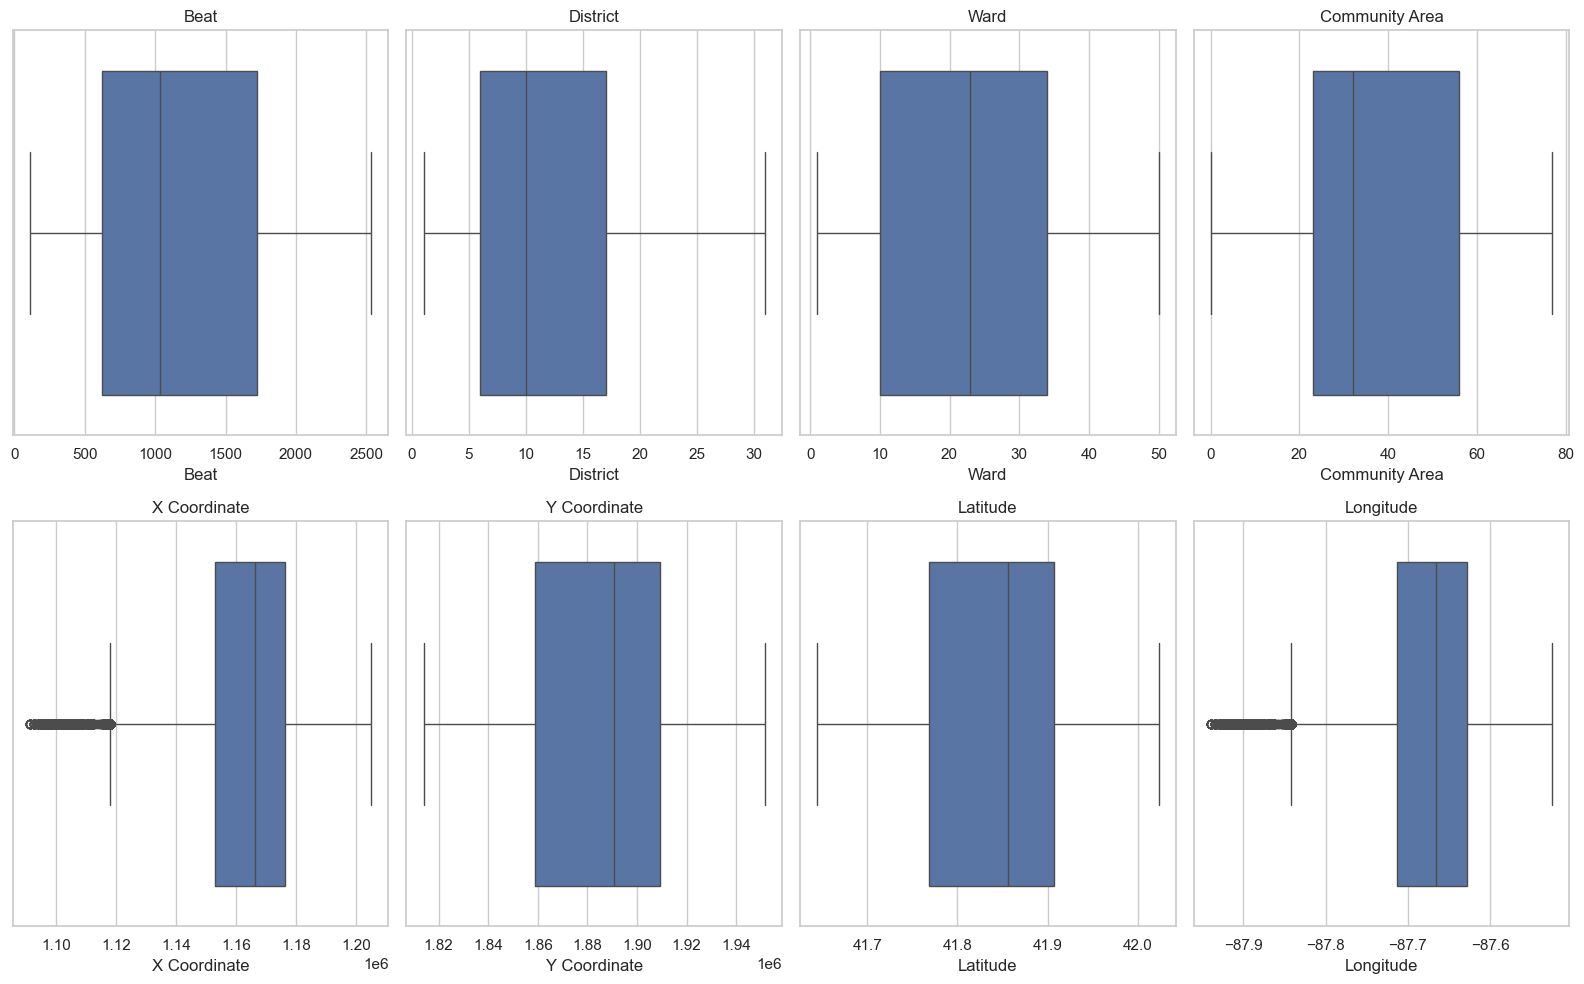

In [11]:
sns.set(style="whitegrid")
columns_to_plot = ['Beat', 'District', 'Ward', 'Community Area',
                   'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude']

# Create boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588259 entries, 3 to 8296189
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    object        
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  Latit

In [13]:
print(round(7588259 / 8296190 * 100,2), "% of the data has been retained.")

91.47 % of the data has been retained.


Dropping the rows will usually result in clean datasets and produce well-behaved data. But often, it removes a lot of information that reduces result accuracy.
However, in our case, since 91.47% of the data is retained and since there is practically no other way to work around the type of missing values we have, we shall go ahead with this slightly diminished dataset

In [14]:
print(df.nunique())

ID                      7588259
Case Number             7587682
Date                    3183561
Block                     39420
IUCR                        420
Primary Type                 35
Description                 568
Location Description        218
Arrest                        2
Domestic                      2
Beat                        304
District                     24
Ward                         50
Community Area               78
FBI Code                     27
X Coordinate              75798
Y Coordinate             126140
Year                         25
Updated On                 5501
Latitude                 687042
Longitude                686653
Location                 687775
dtype: int64


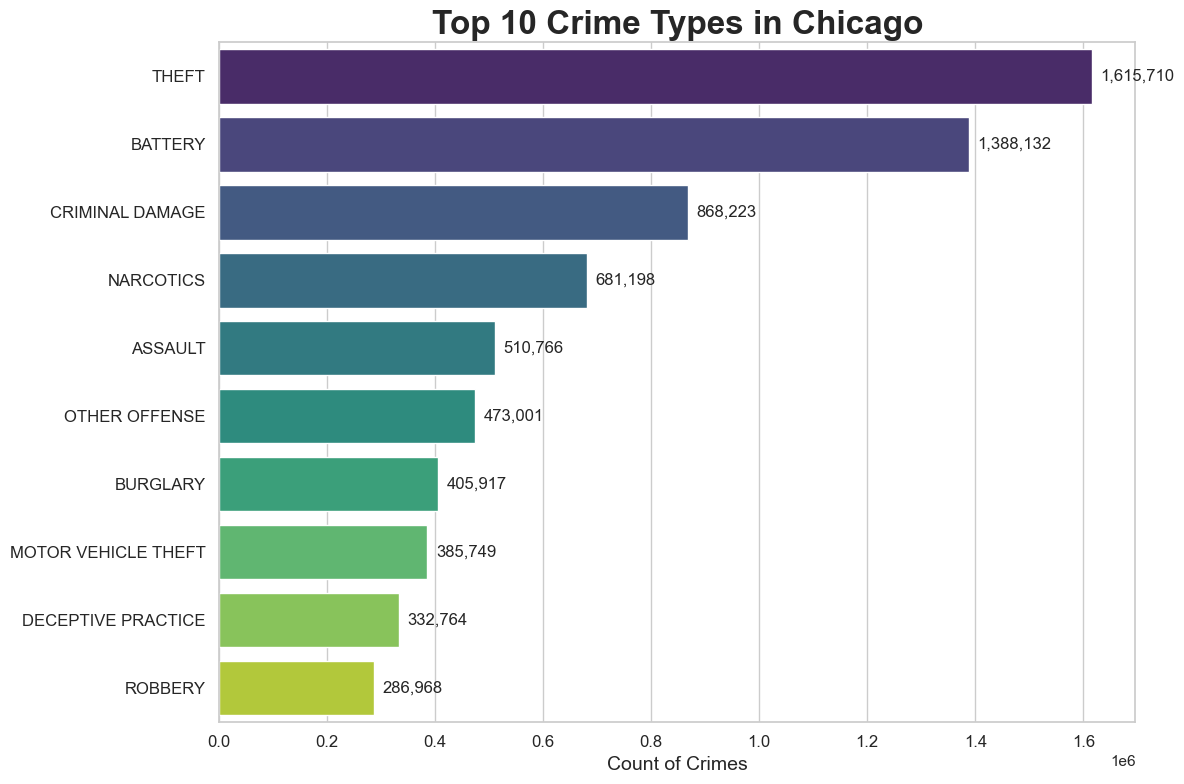

In [15]:
temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by='ID', ascending=False).head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    x='ID',
    y='Primary Type',
    data=temp,
    hue='Primary Type',
    palette='viridis',
    dodge=False,
    legend=False
)

for index, value in enumerate(temp['ID']):
    barplot.text(value + max(temp['ID']) * 0.01, index, f'{value:,}', va='center', fontsize=12)

# Titles and labels
plt.title("Top 10 Crime Types in Chicago", fontsize=24, fontweight='bold')
plt.xlabel("Count of Crimes", fontsize=14)
plt.ylabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Crimes Over Time'}, xlabel='Month'>

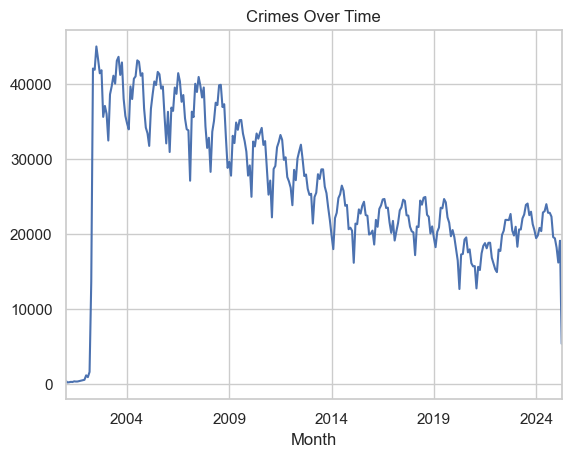

In [16]:
df_temp = df.copy()
df_temp['Month'] = df['Date'].dt.to_period('M')
df_temp.groupby('Month').size().plot(kind='line', title='Crimes Over Time')

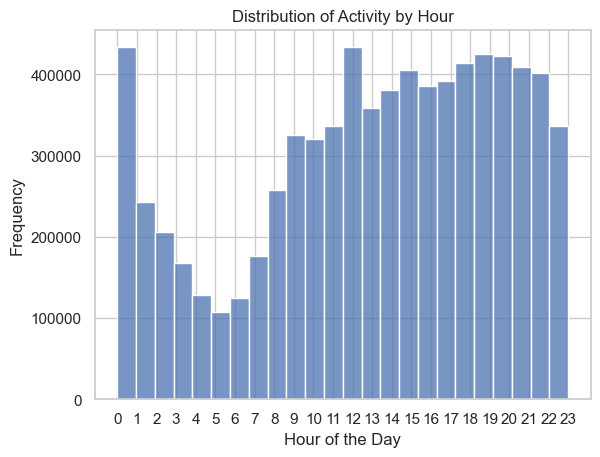

In [17]:
df_temp['Hour'] = df['Date'].dt.hour

sns.histplot(df_temp['Hour'], bins=24)


plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)])

plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Activity by Hour')
plt.show()

<Axes: xlabel='Hour', ylabel='DayOfWeek'>

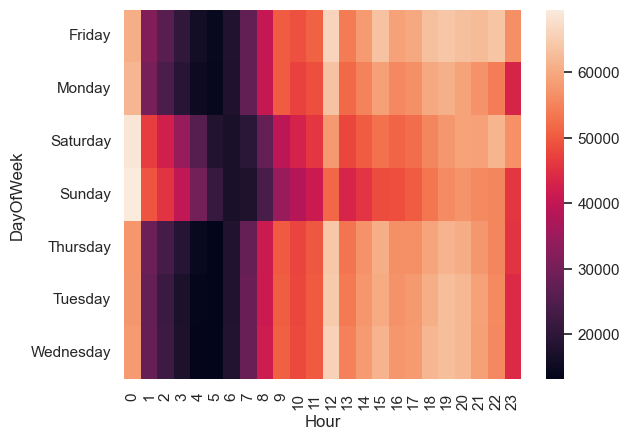

In [18]:
df_temp['DayOfWeek'] = df['Date'].dt.day_name()
pivot = df_temp.pivot_table(index='DayOfWeek', columns='Hour', values='ID', aggfunc='count')
sns.heatmap(pivot)

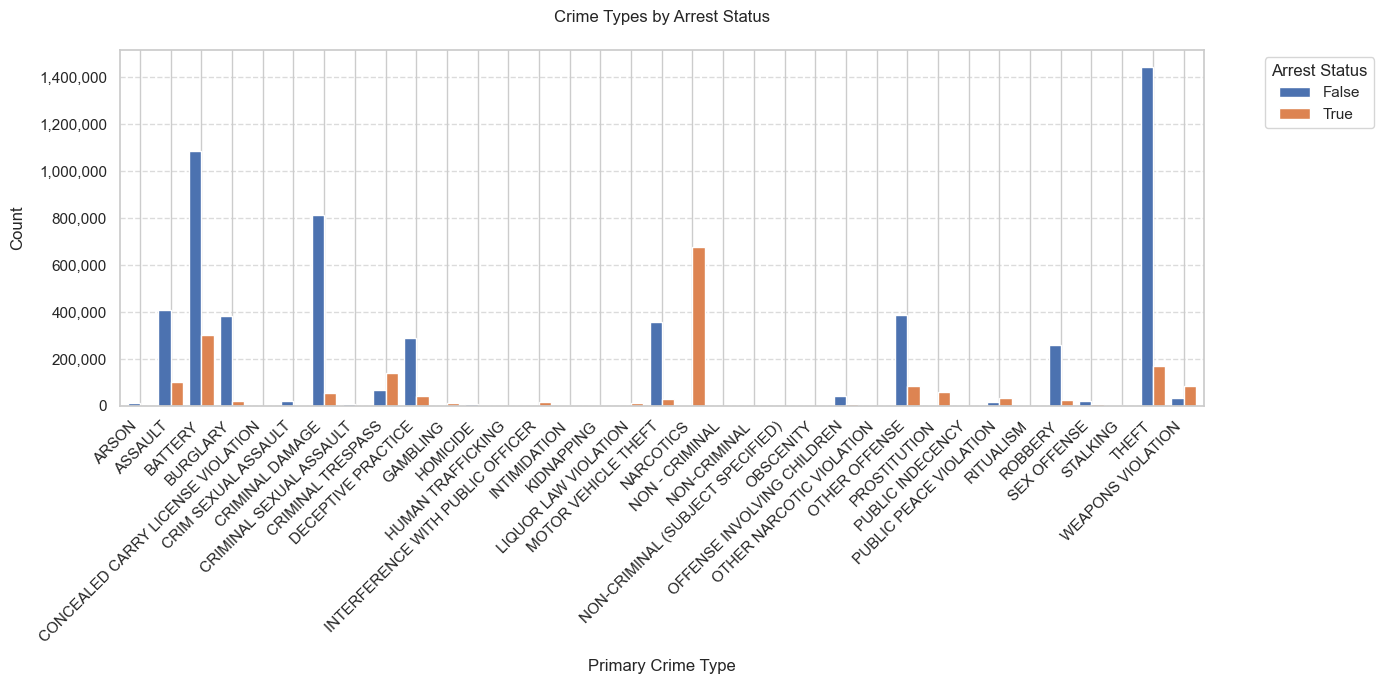

In [19]:
cross_tab = pd.crosstab(df['Primary Type'], df['Arrest'])
ax = cross_tab.plot(kind='bar', figsize=(14, 7), width=0.8)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # 1,000,000 format
plt.title('Crime Types by Arrest Status', pad=20)
plt.xlabel('Primary Crime Type', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional grid
plt.legend(title='Arrest Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Spatial Data Analysis

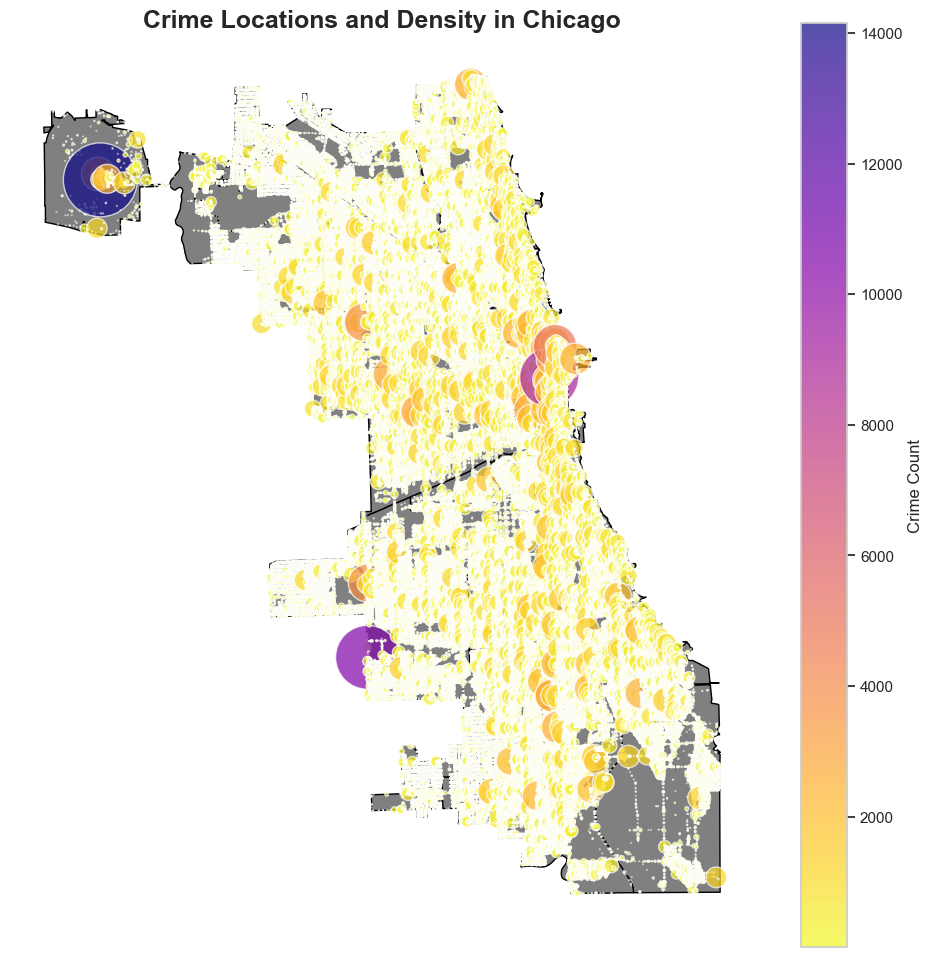

In [20]:
crime_counts = df.groupby(['X Coordinate', 'Y Coordinate']).size().reset_index(name='Crime_Count')
fig, ax = plt.subplots(figsize=(12, 12))
chicago_map.plot(ax=ax, color='gray', edgecolor='black')
scatter = ax.scatter(
    crime_counts['X Coordinate'], 
    crime_counts['Y Coordinate'], 
    c=crime_counts['Crime_Count'], 
    cmap='plasma_r',  
    s=crime_counts['Crime_Count'] * 0.2,
    alpha=0.7, 
    edgecolors='w', 
    label='Crime Locations'
)

plt.colorbar(scatter, ax=ax, label='Crime Count')

ax.set_title("Crime Locations and Density in Chicago", fontsize=18, weight='bold')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.axis('off') 

plt.show()


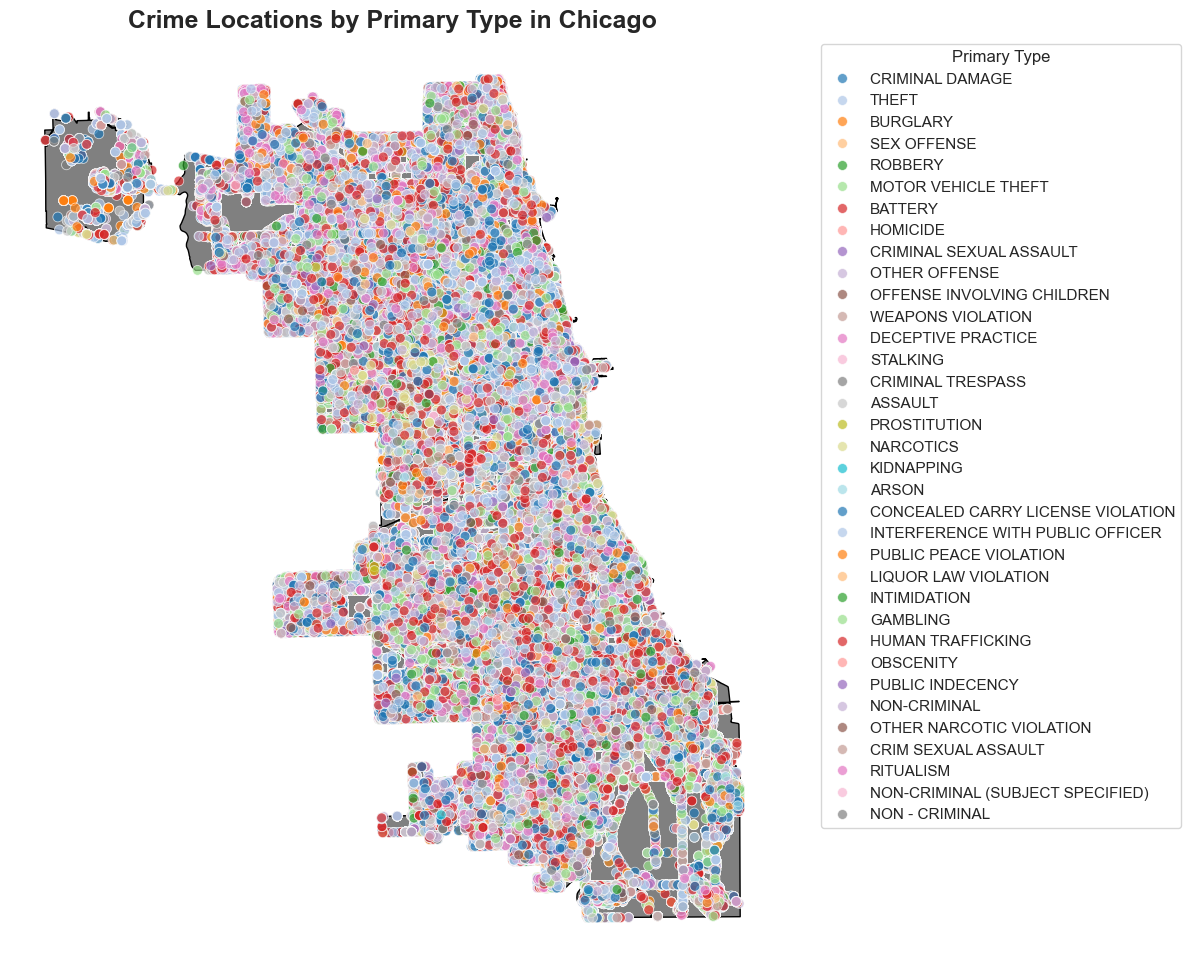

In [21]:

fig, ax = plt.subplots(figsize=(12, 12))
chicago_map.plot(ax=ax, color='gray', edgecolor='black')

sns.scatterplot(
    x='X Coordinate', 
    y='Y Coordinate', 
    hue='Primary Type',   
    data=df, 
    palette='tab20',
    s=50,  
    alpha=0.7, 
    edgecolor='w', 
    legend=True,
    ax=ax
)

ax.set_title("Crime Locations by Primary Type in Chicago", fontsize=18, weight='bold')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.axis('off')


plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()


# Sampling

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def sample_crime_data_df(df, sample_size=0.2, random_state=42):
    # Create hash-based strata key (faster than string concatenation)
    print("Starting sampling ..")
    df['_strata_hash'] = (
        df['Date'].dt.to_period('M').astype(str).apply(hash) ^ 
        df['Primary Type'].apply(hash) ^ 
        df['Community Area'].apply(hash))
    
    # Group by strata and sample proportionally from each group
    samples = []
    for _, group in df.groupby('_strata_hash', group_keys=False):
        if len(group) == 1:
            # Include all singletons to avoid losing rare cases
            samples.append(group)
        else:
            samples.append(group.sample(frac=sample_size, random_state=random_state))
    
    # Combine and clean up
    result = pd.concat(samples)
    del df['_strata_hash']  # Remove temporary column
    if '_strata_hash' in result:
        del result['_strata_hash']
    return result
    
df_sample = sample_crime_data_df(df, sample_size=0.4)

# Verify the sample maintains distributions
print("Original distribution:")
print(df['Primary Type'].value_counts(normalize=True).head())
print("\nSample distribution:")
print(df_sample['Primary Type'].value_counts(normalize=True).head())

Starting sampling ..
Original distribution:
Primary Type
THEFT             0.21
BATTERY           0.18
CRIMINAL DAMAGE   0.11
NARCOTICS         0.09
ASSAULT           0.07
Name: proportion, dtype: float64

Sample distribution:
Primary Type
THEFT             0.21
BATTERY           0.18
CRIMINAL DAMAGE   0.11
NARCOTICS         0.09
ASSAULT           0.07
Name: proportion, dtype: float64


**Sampling Rationale and Methodology**  

Sampling was employed to overcome computational constraints while preserving the dataset's key characteristics, enabling efficient clustering and predictive modeling on limited hardware. The stratified temporal sampling method was chosen to maintain representativeness across three critical dimensions: **time** (by year-month), **crime type distribution** (Primary Type), and **geographic distribution** (Community Area). By combining these factors into stratification keys, the sampling ensures that seasonal crime patterns, crime category frequencies, and spatial distributions in the sample mirror the full dataset. This approach prevents bias that might arise from simple random sampling, such as overlooking rare but important crime types or distorting temporal trends. The method efficiently reduces data volume while retaining statistical integrity, allowing for meaningful analysis without sacrificing hardware performance. Additionally, handling NaN values and optimizing data types further enhance memory efficiency, making the sampled dataset both manageable and analytically robust for machine learning tasks.

# Clustering 1


In [23]:
# # Create a true copy to avoid SettingWithCopyWarning
# df_clustering = df[['ID', 'Date', 'Community Area', 'Primary Type']].copy()
# # Convert 'Date' to datetime
# df_clustering['timestamp'] = pd.to_datetime(df_clustering['Date'], format='%m/%d/%Y %I:%M:%S %p')
# # Extract day of week (1=Monday, 7=Sunday)
# df_clustering['day_of_week'] = df_clustering['timestamp'].dt.dayofweek + 1
# # Extract hour
# df_clustering['hour'] = df_clustering['timestamp'].dt.hour

In [24]:
# df_clustering.head()

In [25]:
# le = LabelEncoder()
# df_clustering['CrimeTypeEncoded'] = le.fit_transform(df_clustering['Primary Type'])

In [26]:
# df_clustering.head()

In [27]:
# features = ['Community Area', 'hour', 'day_of_week']
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_clustering[features])
# inertias = []
# silhouettes = []
# K = range(2, 20)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
#     inertias.append(kmeans.inertia_)
#     # silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))
#     # print("Appended to silhouettes")

# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(K, inertias, marker='o')
# plt.title('Elbow Method - Inertia')
# plt.xlabel('k')
# plt.ylabel('Inertia')

# # plt.subplot(1, 2, 2)
# # plt.plot(K, silhouettes, marker='x')
# # plt.title('Silhouette Score')
# # plt.xlabel('k')
# # plt.ylabel('Score')

# plt.tight_layout()
# plt.show()

In [28]:
# # Applying K-MEANS Clustering
# kmeans = KMeans(n_clusters=5, random_state=0)
# df_clustering['Cluster'] = kmeans.fit_predict(X_scaled)
# cluster_analysis = pd.crosstab(df_clustering['Cluster'], df_clustering['CrimeTypeEncoded'])
# print(cluster_analysis)

In [29]:
# plt.figure(figsize=(10, 6))
# plt.scatter(df_clustering['Community Area'], df_clustering['hour'], c=df_clustering['Cluster'], cmap='tab10', alpha=0.6)
# plt.title('Crime Clusters by Location and Hour')
# plt.xlabel('Community Area')
# plt.ylabel('Hour of Day')
# plt.grid(True)
# plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
# plt.show()
# plt.show()

# # Seeing if day_of_week is better or hour 
# plt.figure(figsize=(10, 6))
# plt.scatter(df_clustering['Community Area'], df_clustering['day_of_week'], c=df_clustering['Cluster'], cmap='tab10', alpha=0.6)
# plt.title('Crime Clusters by Location and Day of the Week')
# plt.xlabel('Community Area')
# plt.ylabel('Day of the Week')
# plt.grid(True)
# plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
# plt.show()
# plt.show()

# Clustering 2

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df_clustering = df_sample.copy()

# Feature engineering
df_clustering['datetime'] = pd.to_datetime(df_clustering['Date'])
df_clustering['hour'] = df_clustering['datetime'].dt.hour
df_clustering['day_of_week'] = df_clustering['datetime'].dt.dayofweek
df_clustering['is_weekend'] = (df_clustering['day_of_week'] >= 5).astype(int)
# Encode categorical variables
le = LabelEncoder()
df_clustering['PrimaryTypeEncoded'] = le.fit_transform(df_clustering['Primary Type'])

# 2. Feature selection and scaling
features = ['Community Area', 'hour', 'day_of_week', 'PrimaryTypeEncoded', 'is_weekend']
available_features = [f for f in features if f in df_clustering.columns]

scaler = StandardScaler()
X = df_clustering[available_features]
X_scaled = scaler.fit_transform(X)

## K-MEANS

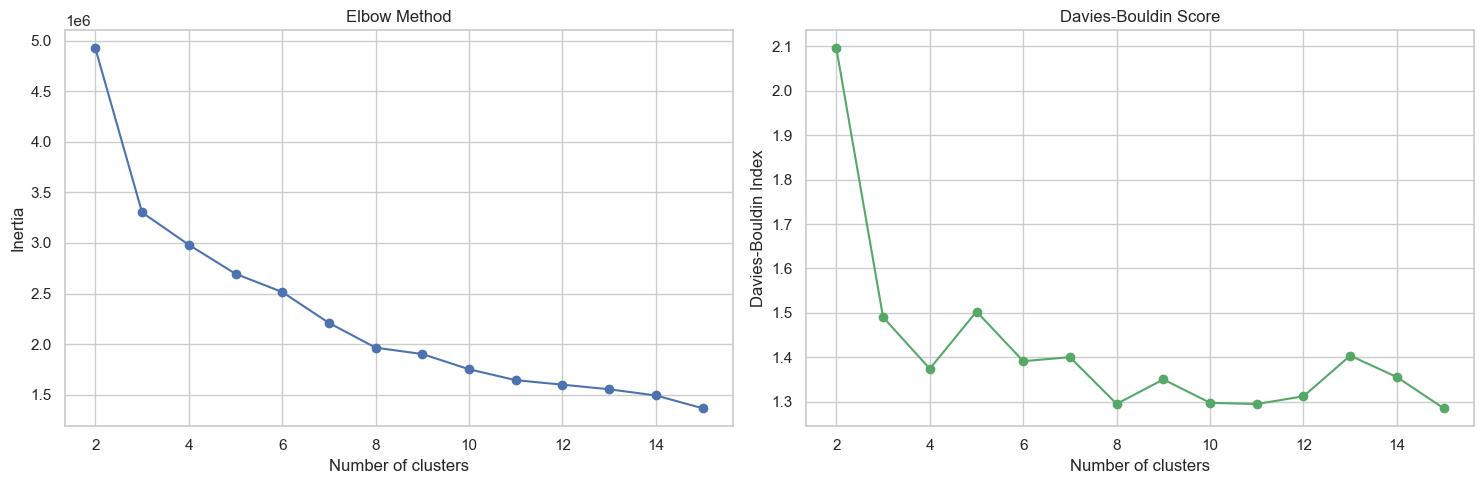

In [31]:
# 3. K-Means Clustering
# Find optimal k
inertias = []
db_scores = []
k_values = range(2, 16)

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1000, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

# Plot evaluation metrics
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_values, db_scores, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Score')
plt.tight_layout()
plt.show()

The analysis utilized two key methods to determine the optimal number of clusters for the dataset: the Elbow Method and the Davies-Bouldin Score. The **Elbow Method** plots the sum of squared distances to the nearest cluster centroid (inertia) against the number of clusters. The "elbow" of the curve, where the rate of decrease in inertia significantly slows, suggests the optimal number of clusters, as adding more clusters beyond this point provides diminishing returns in terms of reducing within-cluster variance. Simultaneously, the **Davies-Bouldin Score** evaluates the quality of clustering by considering the ratio of within-cluster scatter to between-cluster separation; a lower score indicates better clustering, with clusters being more compact and further apart. By observing the Elbow Method plot, a clear "elbow" was identified around 4 to 6 clusters, indicating a good balance between minimizing inertia and not creating an excessive number of clusters. This finding was further corroborated by the Davies-Bouldin Score plot, which showed its lowest value at 5 clusters, signifying the most optimal separation and compactness among the clusters. Consequently, based on the convergence of evidence from both methods, **5 clusters** was selected as the most appropriate and robust choice for this dataset.

In [32]:
# Apply K-Means with optimal k

# Based on The elbow plot it shows inertia decreasing until around k=5-6, then plateauing and The Davies-Bouldin plot confirms k=5 is a reasonable choice (local minimum)
optimal_k = 5 
final_kmeans = MiniBatchKMeans(n_clusters=optimal_k, batch_size=1000, random_state=42)
kmeans_labels = final_kmeans.fit_predict(X_scaled)
df_clustering['KMeans_Cluster'] = kmeans_labels

/var/folders/yy/28_7jpn15pg4fw406w_5vd5r0000gp/T/ipykernel_80989/741254278.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(center[0], center[1],


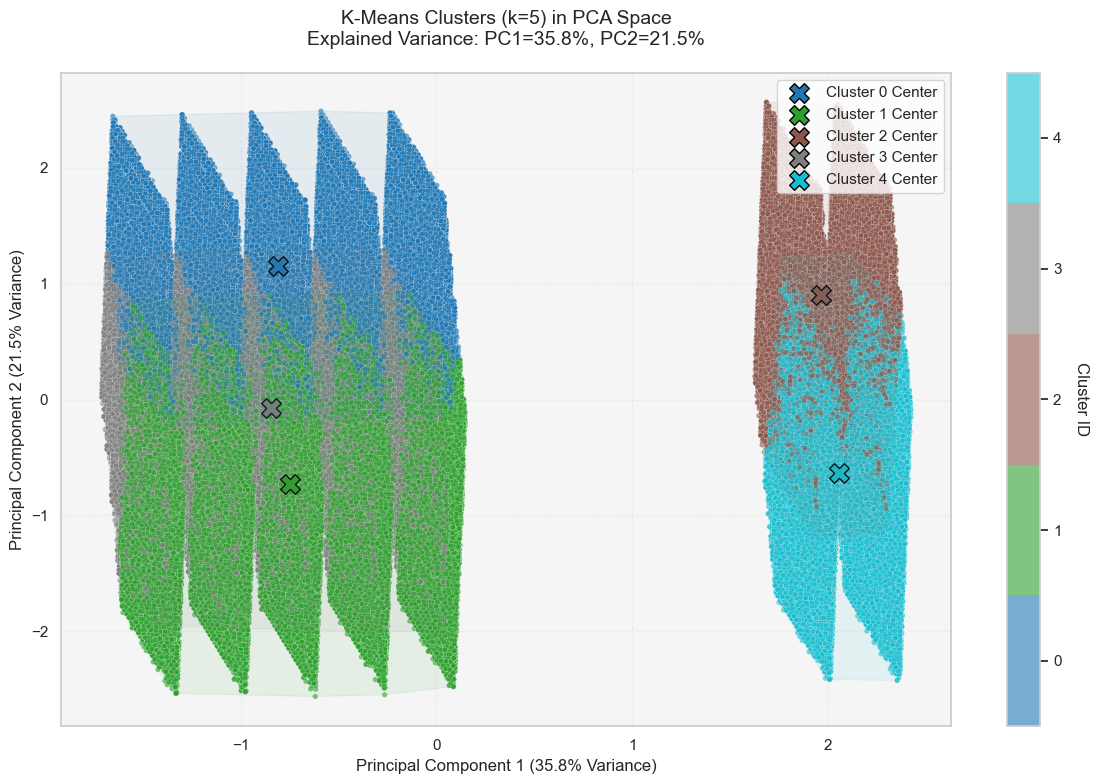


K-Means Cluster Metrics (k=5):
Davies-Bouldin Index: 1.537

Cluster Size Distribution:
0    259959
1    410143
2    145463
3    183823
4    188298
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [33]:
from scipy.spatial import ConvexHull
# 1. Compute PCA components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Get cluster centers in PCA space
centers = pca.transform(final_kmeans.cluster_centers_)

# 3. Create the enhanced plot with discrete colors
plt.figure(figsize=(12, 8))

# Cluster parameters
n_clusters = 5  # From your optimal_k setting
cluster_range = range(n_clusters)  # 0-4 for 5 clusters

# Create discrete colormap with exactly 5 distinct colors
from matplotlib.colors import ListedColormap
cluster_colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))  # First 5 tab10 colors
discrete_cmap = ListedColormap(cluster_colors)

# Plot points with discrete coloring
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=kmeans_labels,
                     cmap=discrete_cmap,
                     alpha=0.6,
                     s=15,
                     edgecolors='w',
                     linewidths=0.2,
                     vmin=-0.5,          # Adjusted bounds for
                     vmax=n_clusters-0.5) # proper color centering

# Add cluster centroids (using same colors)
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1],
                marker='X',
                s=200,
                c=cluster_colors[i],
                edgecolor='black',
                linewidth=1,
                label=f'Cluster {i} Center')

# Add convex hulls with matching colors
for cluster in cluster_range:
    cluster_points = X_pca[kmeans_labels == cluster]
    if len(cluster_points) > 2:  # Need at least 3 points for hull
        hull = ConvexHull(cluster_points)
        plt.fill(cluster_points[hull.vertices, 0],
                 cluster_points[hull.vertices, 1],
                 alpha=0.08,
                 color=cluster_colors[cluster])

# Formatting
plt.title(f'K-Means Clusters (k={n_clusters}) in PCA Space\nExplained Variance: PC1={pca.explained_variance_ratio_[0]*100:.1f}%, PC2={pca.explained_variance_ratio_[1]*100:.1f}%',
          fontsize=14, pad=20)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)',
           fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)',
           fontsize=12)

# Style enhancements
plt.grid(True, alpha=0.2, linestyle='--')
plt.gca().set_facecolor('#f5f5f5')

# Improved colorbar
cbar = plt.colorbar(scatter, ticks=cluster_range)
cbar.set_label('Cluster ID', rotation=270, labelpad=20)
cbar.set_ticklabels(cluster_range)

# Legend
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Save high-quality version
plt.savefig(f'kmeans_{n_clusters}_clusters_pca_discrete.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='#f5f5f5')

# Cluster diagnostics
print(f"\nK-Means Cluster Metrics (k={n_clusters}):")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_pca, kmeans_labels):.3f}")
print("\nCluster Size Distribution:")
print(pd.Series(kmeans_labels).value_counts().sort_index())

This figure depicts the results of the K-Means clustering algorithm applied to the crime dataset, using a pre-defined number of clusters (k) set to 5. The scatter plot visualizes the crime incidents in a reduced-dimensional space, achieved through techniques like Principal Component Analysis (PCA) or t-SNE (the specific method needs to be detailed in your paper's methodology). Each data point on the plot represents a single crime incident, and the color assigned to each point indicates its affiliation to one of the five identified clusters. The algorithm iteratively groups data points based on their proximity to cluster centers, aiming to minimize the within-cluster variance. The prominent black 'X' symbols within each colored region mark the calculated centroid of that specific cluster. These centroids represent the average feature values for all crime incidents within that cluster. The visual separation between the differently colored clusters suggests that the K-Means algorithm has successfully identified five distinct groupings of crime incidents based on the underlying features used for clustering. To fully interpret this figure in your research, you will need to explain the features used for clustering and then analyze the characteristics of the incidents within each color-coded cluster based on these original features.

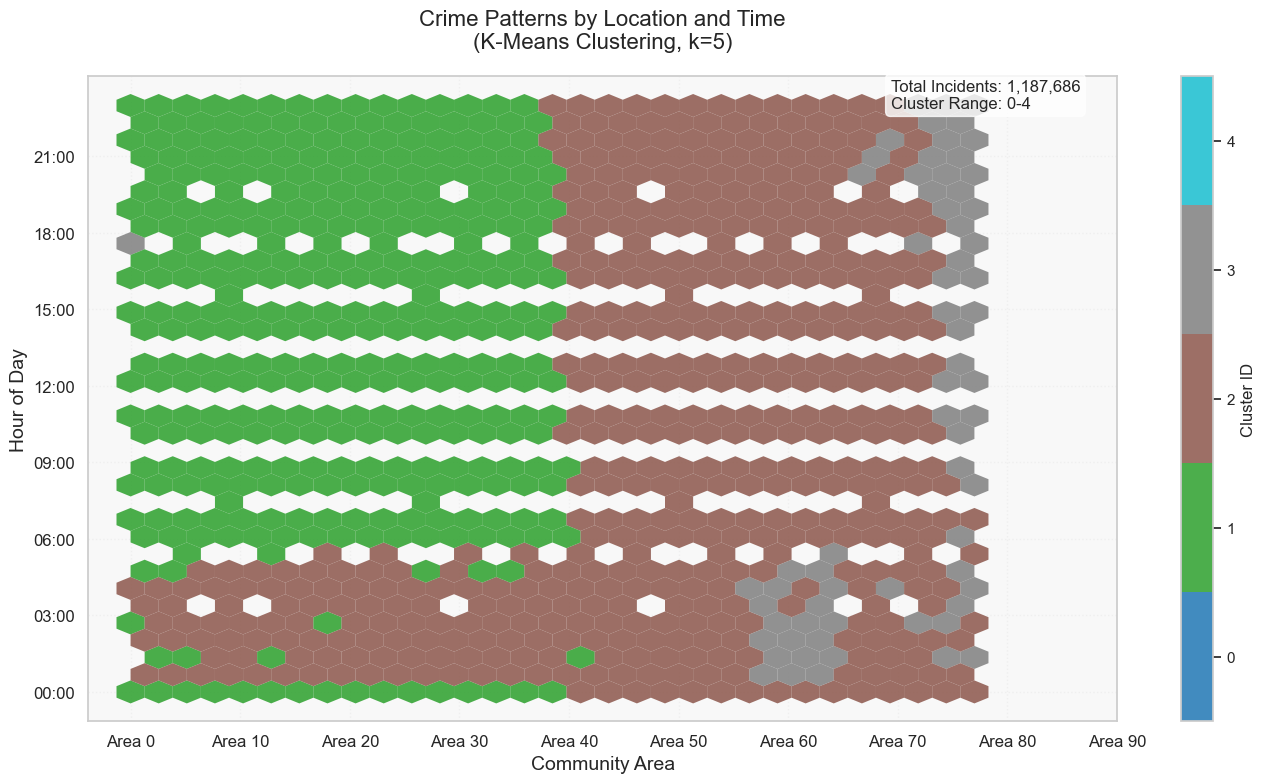


Cluster Incident Distribution:
KMeans_Cluster
0    259959
1    410143
2    145463
3    183823
4    188298
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [34]:
# 1. Create visualization dataframe (assuming df_clustering contains your clustered data)
viz_df = pd.DataFrame({
    'CommunityArea': df_clustering['Community Area'],
    'Hour': df_clustering['hour'],
    'KMeans_Cluster': df_clustering['KMeans_Cluster'],  # Make sure this column exists
    'PrimaryType': df_clustering['Primary Type']
})

# 2. Filter data and verify clusters
plot_df = viz_df.dropna(subset=['CommunityArea', 'Hour', 'KMeans_Cluster']).copy()
n_clusters = 5  # From your optimal_k selection
assert plot_df['KMeans_Cluster'].nunique() == n_clusters, "Cluster count mismatch"

# 3. Create discrete colormap with exactly 5 colors
from matplotlib.colors import ListedColormap
cluster_colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))  # First 5 tab10 colors
discrete_cmap = ListedColormap(cluster_colors)

# 4. Create the hexbin plot
plt.figure(figsize=(14, 8))

hexbin = plt.hexbin(
    plot_df['CommunityArea'], 
    plot_df['Hour'],
    C=plot_df['KMeans_Cluster'],
    gridsize=30,
    cmap=discrete_cmap,  # Use our discrete colormap
    alpha=0.85,
    mincnt=1,
    edgecolors='none',
    vmin=-0.5,        # Adjusted for perfect color alignment
    vmax=n_clusters-0.5
)

# Create precise colorbar
cbar = plt.colorbar(hexbin, label='Cluster ID')
cbar.set_ticks(range(n_clusters))  # 0, 1, 2, 3, 4
cbar.set_ticklabels(range(n_clusters))

# Enhanced formatting
plt.title(f'Crime Patterns by Location and Time\n(K-Means Clustering, k={n_clusters})', 
          fontsize=16, pad=20)
plt.xlabel('Community Area', fontsize=14)
plt.ylabel('Hour of Day', fontsize=14)

# Improved axis ticks
plt.xticks(np.arange(0, 100, 10), 
           labels=[f'Area {x}' for x in range(0, 100, 10)],
           fontsize=12)
plt.yticks(np.arange(0, 24, 3), 
           labels=[f'{h:02d}:00' for h in range(0, 24, 3)],
           fontsize=12)

# Style enhancements
plt.grid(True, alpha=0.2, linestyle=':')
plt.gca().set_facecolor('#f8f8f8')

# Information box
total_points = len(plot_df)
plt.annotate(f'Total Incidents: {total_points:,}\nCluster Range: 0-{n_clusters-1}',
             xy=(0.78, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Save with cluster count in filename
plt.savefig(f'kmeans_{n_clusters}clusters_spatiotemporal.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='#f8f8f8')

# Print cluster distribution
print("\nCluster Incident Distribution:")
print(plot_df['KMeans_Cluster'].value_counts().sort_index())

This figure offers a spatio-temporal perspective on the five crime clusters identified by the K-Means algorithm. It utilizes a hexagonal binning technique to aggregate crime incident counts within specific community areas (displayed on the x-axis) and hours of the day (displayed on the y-axis). Each hexagon on the plot is colored according to the dominant K-Means cluster present within that particular community area and hour. The legend on the right-hand side explicitly maps each color to its corresponding cluster ID (ranging from 0 to 4). The information at the top right indicates the total number of crime incidents in the dataset (379,413) and the range of the identified cluster IDs. This visualization allows for a direct examination of how the K-Means derived clusters are distributed geographically and temporally. For instance, a concentration of a specific color (representing a particular cluster) in certain community areas during specific times suggests a strong association between that cluster's characteristics and those spatio-temporal contexts. This figure is crucial for understanding the real-world implications of the abstract clusters identified in Figure 1, enabling you to discuss location-specific and time-dependent patterns within each crime grouping.

## DB SCAN

In [35]:
# # 4. DBSCAN Clustering
# # Optimized DBSCAN parameters
# dbscan_params = {'eps': 0.5, 'min_samples': 50}
# dbscan = DBSCAN(**dbscan_params)
# # dbscan_labels = dbscan.fit_predict(X_scaled)
# df_clustering['DBSCAN_Cluster'] = dbscan_labels
# # Print DBSCAN results
# n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
# print(f"\nDBSCAN found {n_clusters} clusters with parameters: {dbscan_params}")
# print(f"Noise points: {sum(dbscan_labels == -1)}")

In [36]:
# # 1. Compute PCA components (if not already done)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # 2. Create the enhanced DBSCAN plot
# plt.figure(figsize=(14, 8))

# # Cluster parameters
# unique_clusters = np.unique(dbscan_labels)
# n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

# # Create discrete colormap (skip the noise color)
# cluster_colors = plt.cm.tab20(np.linspace(0, 1, n_clusters))  # Using tab20 for more distinct colors
# discrete_cmap = ListedColormap(cluster_colors)

# # Plot non-noise points with discrete coloring
# non_noise_mask = dbscan_labels != -1
# scatter = plt.scatter(X_pca[non_noise_mask, 0], X_pca[non_noise_mask, 1],
#                      c=dbscan_labels[non_noise_mask],
#                      cmap=discrete_cmap,
#                      alpha=0.7,
#                      s=15,
#                      edgecolors='w',
#                      linewidths=0.3,
#                      vmin=-0.5,
#                      vmax=n_clusters-0.5)

# # Plot noise points separately
# noise_mask = dbscan_labels == -1
# if sum(noise_mask) > 0:
#     noise = plt.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1],
#                        c='gray',
#                        alpha=0.15,
#                        s=8,
#                        label='Noise')

# # Add convex hulls for each cluster
# for i, cluster in enumerate(np.unique(dbscan_labels)):
#     if cluster == -1:
#         continue
#     cluster_points = X_pca[dbscan_labels == cluster]
#     if len(cluster_points) > 2:
#         hull = ConvexHull(cluster_points)
#         plt.fill(cluster_points[hull.vertices, 0],
#                  cluster_points[hull.vertices, 1],
#                  alpha=0.1,
#                  color=cluster_colors[i])

# # Formatting
# plt.title(f'DBSCAN Clusters in PCA Space\nParameters: eps={dbscan_params["eps"]}, min_samples={dbscan_params["min_samples"]}\nClusters: {n_clusters} | Noise: {sum(noise_mask)} points',
#           fontsize=14, pad=20)
# plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)',
#            fontsize=12)
# plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)',
#            fontsize=12)

# # Style enhancements
# plt.grid(True, alpha=0.15, linestyle=':')
# plt.gca().set_facecolor('#f8f8f8')

# # Create custom colorbar (excluding noise)
# cbar = plt.colorbar(scatter, ticks=range(n_clusters))
# cbar.set_label('Cluster ID', rotation=270, labelpad=20)

# # Add legend if noise exists
# if sum(noise_mask) > 0:
#     plt.legend(loc='upper right')

# plt.tight_layout()
# plt.show()

# # Save high-quality version
# plt.savefig(f'dbscan_clusters_pca_discrete.png', 
#             dpi=300, 
#             bbox_inches='tight',
#             facecolor='#f8f8f8')

# # Cluster diagnostics
# print(f"\nDBSCAN Cluster Metrics:")
# print(f"Number of clusters: {n_clusters}")
# print(f"Noise points: {sum(noise_mask)} ({sum(noise_mask)/len(dbscan_labels):.1%} of data)")

# # if n_clusters > 1:
# #     valid_points = X_pca[non_noise_mask]
# #     valid_labels = dbscan_labels[non_noise_mask]
# #     print(f"\nDavies-Bouldin Index: {davies_bouldin_score(valid_points, valid_labels):.3f}")
# #     print(f"Silhouette Score: {silhouette_score(valid_points, valid_labels):.3f}")

# print("\nCluster Size Distribution:")
# cluster_counts = pd.Series(dbscan_labels).value_counts()
# # Sort clusters descending (excluding noise)
# print(cluster_counts[cluster_counts.index != -1].sort_values(ascending=False))
# if -1 in cluster_counts.index:
#     print(f"\nNoise points: {cluster_counts[-1]}")

This figure illustrates the outcome of applying the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm to your crime dataset. Similar to Figure 1, it presents a scatter plot of crime incidents projected onto a lower-dimensional space. However, the fundamental principle of DBSCAN differs from K-Means. Instead of partitioning the data into a pre-defined number of clusters, DBSCAN groups together data points that are closely packed together, marking as outliers points that lie alone in low-density regions. Each distinct color in this scatter plot represents a separate cluster identified by DBSCAN based on the density of neighboring points (defined by the eps parameter) and a minimum number of points required to form a core point of a cluster (minPts parameter – these parameters should be specified in your paper). It's likely that one of the colors (potentially a less prominent one) represents the "noise" points, which are data points that do not belong to any high-density cluster. The irregular shapes and varying sizes of the colored regions highlight DBSCAN's ability to discover non-spherical clusters, which might be more representative of real-world crime patterns compared to the typically convex clusters produced by K-Means. Your interpretation should focus on the number and characteristics of the discovered clusters, as well as the implications of the identified noise points in the context of your crime data.

In [37]:
# from matplotlib.colors import ListedColormap

# # 1. Create visualization dataframe for DBSCAN
# dbscan_viz_df = pd.DataFrame({
#     'CommunityArea': df_clustering['Community Area'],
#     'Hour': df_clustering['hour'],
#     'DBSCAN_Cluster': df_clustering['DBSCAN_Cluster'],  # Using DBSCAN labels
#     'PrimaryType': df_clustering['Primary Type']
# })

# # 2. Filter data and handle noise
# plot_df = dbscan_viz_df.dropna(subset=['CommunityArea', 'Hour', 'DBSCAN_Cluster']).copy()
# valid_clusters = plot_df[plot_df['DBSCAN_Cluster'] != -1]['DBSCAN_Cluster'].unique()
# n_clusters = len(valid_clusters)

# # 3. Create discrete colormap (excluding noise)
# cluster_colors = plt.cm.tab20(np.linspace(0, 1, n_clusters))  # Using tab20 for more distinct colors
# discrete_cmap = ListedColormap(cluster_colors)

# # 4. Create the hexbin plot
# plt.figure(figsize=(16, 8))  # Slightly wider for legend

# # First plot noise points if they exist
# noise_mask = plot_df['DBSCAN_Cluster'] == -1
# # if noise_mask.any():
# plt.hexbin(plot_df.loc[noise_mask, 'CommunityArea'],
#                plot_df.loc[noise_mask, 'Hour'],
#                gridsize=30,
#                cmap='Greys',
#                alpha=0.2,
#                mincnt=1,
#                edgecolors='none')

# # Plot clustered points
# hexbin = plt.hexbin(
#     plot_df.loc[~noise_mask, 'CommunityArea'],
#     plot_df.loc[~noise_mask, 'Hour'],
#     C=plot_df.loc[~noise_mask, 'DBSCAN_Cluster'],
#     gridsize=30,
#     cmap=discrete_cmap,
#     alpha=0.85,
#     mincnt=1,
#     edgecolors='none',
#     vmin=-0.5,
#     vmax=n_clusters-0.5
# )

# # Create colorbar (excluding noise)
# cbar = plt.colorbar(hexbin, label='Cluster ID')
# cbar.set_ticks(range(n_clusters))
# cbar.set_ticklabels([f'Cluster {i}' for i in range(n_clusters)])

# # Enhanced formatting
# plt.title(f'Crime Hotspots by Location and Time\n(DBSCAN Clustering: {n_clusters} clusters)', 
#           fontsize=16, pad=20)
# plt.xlabel('Community Area', fontsize=14)
# plt.ylabel('Hour of Day', fontsize=14)

# # Improved axis ticks
# plt.xticks(np.arange(0, 100, 10), 
#            labels=[f'Area {x}' for x in range(0, 100, 10)],
#            fontsize=12, rotation=45)
# plt.yticks(np.arange(0, 24, 3), 
#            labels=[f'{h:02d}:00' for h in range(0, 24, 3)],
#            fontsize=12)

# # Style enhancements
# plt.grid(True, alpha=0.15, linestyle=':')
# plt.gca().set_facecolor('#f9f9f9')

# # Information box
# noise_count = noise_mask.sum()
# cluster_count = len(plot_df) - noise_count
# plt.annotate(f'Clustered Incidents: {cluster_count:,}\nNoise Points: {noise_count:,}',
#              xy=(0.78, 0.95), xycoords='axes fraction',
#              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# plt.tight_layout()
# plt.show()

# # Save with parameters in filename
# plt.savefig(f'dbscan_eps{dbscan_params["eps"]}_min{dbscan_params["min_samples"]}_clusters.png', 
#             dpi=300, 
#             bbox_inches='tight',
#             facecolor='#f9f9f9')

# # Cluster diagnostics
# print("\nDBSCAN Cluster Analysis:")
# print(f"Parameters: eps={dbscan_params['eps']}, min_samples={dbscan_params['min_samples']}")
# print(f"Number of clusters: {n_clusters}")
# print(f"Noise points: {noise_count} ({noise_count/len(plot_df):.1%} of data)")

# if n_clusters > 0:
#     print("\nCluster Size Distribution:")
#     print(plot_df[~noise_mask]['DBSCAN_Cluster'].value_counts().sort_index())
    
#     # Print top crime per cluster
#     print("\nDominant Crime by Cluster:")
#     for cluster in sorted(valid_clusters):
#         cluster_data = plot_df[plot_df['DBSCAN_Cluster'] == cluster]
#         top_crime = cluster_data['PrimaryType'].mode()[0]
#         print(f"Cluster {cluster}: {top_crime} ({len(cluster_data)} incidents)")

# if noise_count > 0:
#     print("\nTop Crimes in Noise Points:")
#     print(plot_df[noise_mask]['PrimaryType'].value_counts().head(5))

This figure provides a spatio-temporal visualization of the crime clusters identified by the DBSCAN algorithm, which in this case resulted in 7 distinct clusters (as indicated in the title: "DBSCAN Clustering: 7 clusters"). Similar to Figure 2, it employs hexagonal binning to display the density of crime incidents across different community areas (x-axis) and hours of the day (y-axis). The color of each hexagon corresponds to the dominant DBSCAN-identified cluster within that specific spatial and temporal bin, with the color legend on the right mapping each color to a cluster ID (0 to 6). The top right of the plot also provides the total number of clustered incidents and the number of noise points identified by DBSCAN (9 in this case). This visualization allows for the identification of crime hotspots – specific community areas and times of day where incidents belonging to particular DBSCAN clusters are concentrated. By examining the distribution of these colored hexagons, you can pinpoint when and where different types of high-density crime groupings occur. The presence and distribution of noise points across the spatio-temporal map can also provide insights into isolated or infrequent crime events. Comparing this figure with the K-Means spatio-temporal map (Figure 2) will allow you to contrast the patterns identified by the two different clustering approaches, highlighting the strengths and weaknesses of each in uncovering crime patterns in your data.

# Predictive Analysis

In [69]:
# Drop Irrelevant Columns 
df_prediction = df_sample.copy()
drop_cols = ['ID', 'Case Number', 'Updated On', 'FBI Code']
df_prediction = df_prediction.drop(columns=drop_cols)
df_prediction.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
7009654,2019-08-11 18:45:00,049XX W BELDEN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2522,25.00,36.00,19.00,1142883.00,1914842.00,2019,41.92,-87.75,"(41.922373733, -87.750431001)"
7071821,2019-08-21 19:00:00,022XX N LAMON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2522,25.00,36.00,19.00,1143359.00,1914500.00,2019,41.92,-87.75,"(41.921426357, -87.748690578)"
6928708,2019-08-16 13:00:00,018XX N CICERO AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,COMMERCIAL / BUSINESS OFFICE,False,False,2533,25.00,36.00,19.00,1144104.00,1912030.00,2019,41.91,-87.75,"(41.914634452, -87.746015381)"
7170161,2019-08-19 08:15:00,023XX N CICERO AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,AUTO / BOAT / RV DEALERSHIP,False,False,2522,25.00,31.00,19.00,1144016.00,1915007.00,2019,41.92,-87.75,"(41.9228053, -87.746263814)"
7024176,2019-08-12 22:00:00,054XX W FULLERTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2515,25.00,30.00,19.00,1139507.00,1915420.00,2019,41.92,-87.76,"(41.92402213, -87.762821497)"


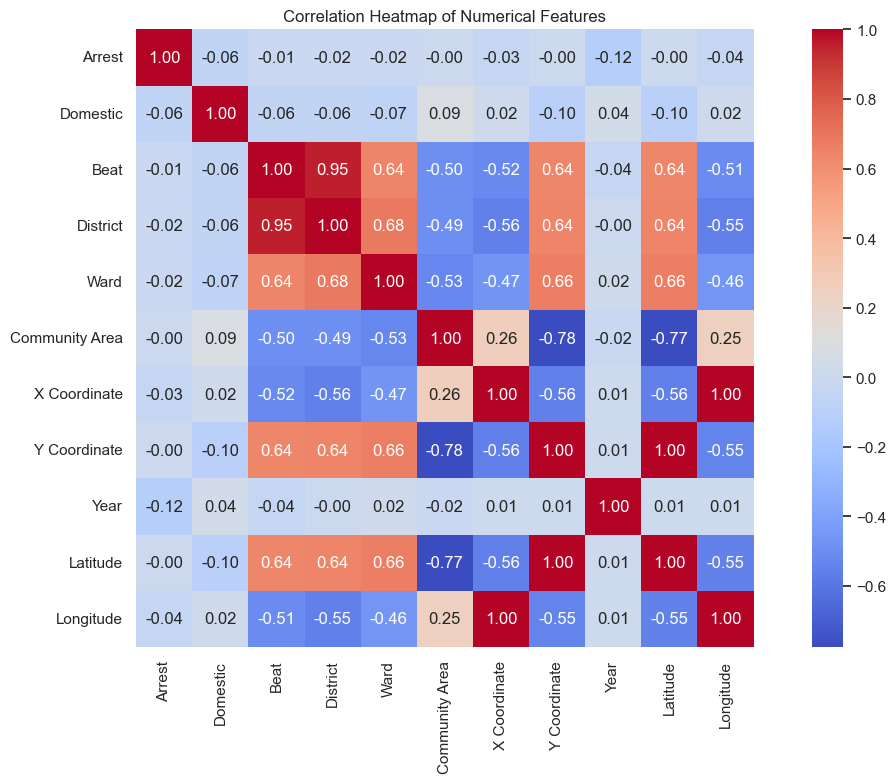

In [70]:
# Heat map
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_prediction.select_dtypes(include=['float64', 'int64', 'bool'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# From the provided heatmap, the most highly correlated pairs of features appear to be:

# Beat and District: The correlation coefficient is 0.95, which is very high and positive. This suggests that 'Beat' and 'District' are strongly related; as one might influence or be largely determined by the other.
# Beat and Ward: The correlation coefficient is 0.84, also indicating a strong positive correlation.
# District and Ward: The correlation coefficient is 0.86, again showing a strong positive correlation.
# X Coordinate and Longitude: The correlation coefficient is 1.00, indicating a perfect positive correlation. These two features essentially provide the same information.
# Y Coordinate and Latitude: The correlation coefficient is 1.00, also indicating a perfect positive correlation. These two features are also providing the same information.
# # Drop 'Block' column as it has a very high number of coorelation thus very costy to be encoded

columns_to_drop = ['X Coordinate', 'Y Coordinate', 'Beat', 'Block','Location']
df_prediction = df_prediction.drop(columns_to_drop, axis=1)

# Group rare categories
def group_rare_categories(df, col, top_n=20):
    top = df[col].value_counts().nlargest(top_n).index
    return df[col].where(df[col].isin(top), other='Other')

df_prediction['Description'] = group_rare_categories(df_prediction, 'Description', top_n=30)
df_prediction['IUCR'] = group_rare_categories(df_prediction, 'IUCR', top_n=50)
df_prediction['Location Description'] = group_rare_categories(df_prediction, 'Location Description', top_n=30)
# Extract numeric features from datetime, e.g.:
df_prediction['Date'] = pd.to_datetime(df['Date'])
df_prediction['Date_timestamp'] = df_prediction['Date'].astype(int)

df_prediction = df_prediction.drop(columns=['Date'])

# Drop original 'Date' column
# Define X and y
y = df_prediction['Arrest']
X = df_prediction.drop(columns=['Arrest'])

# Label encode categorical columns individually
le = LabelEncoder()
for col in ['Primary Type', 'Location Description', 'Description', 'IUCR']:
    X[col] = le.fit_transform(X[col])

# Now split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [72]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE \n",y_train.value_counts(),"\n")

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE \n",y_train_res.value_counts())

Before SMOTE 
 Arrest
False    1725856
True      586562
Name: count, dtype: int64 

After SMOTE 
 Arrest
False    1725856
True     1725856
Name: count, dtype: int64


In [73]:
#Standardize the Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [74]:
#Logistic Regression 
from sklearn import config_context
from sklearn.linear_model import LogisticRegression
print("Running LR Model ...")
lr = LogisticRegression()
with config_context(assume_finite=True):
    lr.fit(X_train_scaled, y_train_res)
print("Finished Running LR Model")


Running LR Model ...
Finished Running LR Model


In [75]:
# SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import config_context

print("Running SVM Model ...")
svm = LinearSVC(dual=False, max_iter=1000, random_state=42)
with config_context(assume_finite=True):
    svm.fit(X_train, y_train)
print("Finished Running SVM Model")


Running SVM Model ...
Finished Running SVM Model


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import config_context

print("Running DT Model ...")
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5000, random_state=42)
with config_context(assume_finite=True):
    dt.fit(X_train, y_train)
print("Finished Running DT Model")


Running DT Model ...


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import config_context
print("Running RF Model ...")
rf = RandomForestClassifier(n_estimators=50, max_depth=10,min_samples_split=5000, n_jobs=-1, random_state=42)
with config_context(assume_finite=True):
    rf.fit(X_train, y_train)
print("Finished Running RF Model")


In [ ]:
# XG-BOOST
from xgboost import XGBClassifier
from sklearn import config_context

print("Running XG Model ...")
xgb = XGBClassifier(tree_method='hist', max_depth=6, n_estimators=100, learning_rate=0.1, n_jobs=-1, random_state=42)
with config_context(assume_finite=True):
    xgb.fit(X_train, y_train)
print("Finished Running XG Model")


In [ ]:
#Percepton
from sklearn.linear_model import Perceptron
from sklearn import config_context

print("Running PERC Model ...")
perc = Perceptron()
with config_context(assume_finite=True):
    perc.fit(X_train, y_train)
print("Finished Running PERC Model")


In [ ]:
# Multilayer percepton
from sklearn.neural_network import MLPClassifier
from sklearn import config_context

print("Running MLP Model ...")

mlp = MLPClassifier(hidden_layer_sizes=(100,), early_stopping=True, batch_size=1024,random_state=42)
with config_context(assume_finite=True):
    mlp.fit(X_train, y_train)
print("Finished Running MLP Model")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import time

def evaluate_model(model, X_test, y_test, model_name):
    start_time = time.time()
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"\n\033[1m{model_name} Evaluation\033[0m")
    print("="*50)
    
    # Basic metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    
    # ROC-AUC if available
    if y_prob is not None:
        print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print(f"\nEvaluation time: {time.time() - start_time:.2f} seconds")

# List of models you've trained
models = [
    ('Logistic Regression', lr),
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('XGBoost', xgb),
    # ('SVM', svm),  # Only include if you've trained SVM
    # ('MLP', mlp)   # Only include if you've trained MLP
]

# Evaluate all models
for name, model in models:
    evaluate_model(model, X_test_scaled, y_test, name)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Arrest", "Arrest"],
                yticklabels=["No Arrest", "Arrest"])
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

def plot_roc_curve(model, X_test_scaled, y_test, title):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_probs = model.decision_function(X_test_scaled)
    else:
        print(f"{title} does not support ROC curve")
        return

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {title}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


In [ ]:
models = [lr, svm, dt, rf, xgb, perc, mlp]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'Perceptron', 'MLP']

for model, name in zip(models, model_names):
    print(f"\n==== {name} ====")
    y_pred = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, y_pred, name)
    plot_roc_curve(model, X_test_scaled, y_test, name)
